<a href="https://colab.research.google.com/github/Wiimmbo/Sistema-Inmune-Artificial/blob/main/ClonalSelectionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSA Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys

##Utils

In [2]:
def get_n_distinct_colors(n):
    """
    Returns a list of n distinct colors in RGB format.
    """
    colors = []
    for i in range(n):
        hue = i / n
        rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        colors.append((rgb[0], rgb[1], rgb[2]))
    return colors

##Benchmark Functions

In [3]:
class BenchmarkFunction():
    """
    Benchmark function class.
    """
    def __init__(self, function, features, limits):
        """
        Class constructor

        Parameters:
        function (function): Function to evaluate.
        features (int): Number of features.
        limits (float): Search space limits.
        global_min (float): Known Global minimum of the function.
        """
        self.function = function
        self.features = features
        self.limits = limits
        self.global_min = self.evaluate(np.array([0]))

    def evaluate(self, X):
        """
        Evaluate the function in the given point.

        Parameters:
        X (np.ndarray): Point to elvaualte.

        Returns:
        np.ndarray: Function value.
        """
        return self.function(X)

    def graph(self, solutions=None):
        """
        Graph the function.
        """
        # Search space
        x = np.linspace(-self.limits, self.limits, 100)
        y = np.linspace(-self.limits, self.limits, 100)
        X, Y = np.meshgrid(x, y)
        Z = self.evaluate(np.array([X,Y]))

        # Contour
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.contour(X, Y, Z, levels=20, cmap='viridis')
        if solutions is not None:
            plt.plot(solutions[:, 0], solutions[:, 1], 'ro', label='Solutions')
        plt.title('Contour lines')
        plt.ylabel('Y')
        plt.xlabel('X')
        plt.legend()
        plt.show()

        # Graphic
        plt.figure(figsize=(10, 5))
        ax = plt.subplot(122, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')
        if solutions is not None:
            ax.scatter(solutions[:, 0], solutions[:, 1], self.evaluate(solutions.T), c='r', label='Solutions')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('F(X,Y)')
        ax.set_title('Function Graph')
        ax.legend()
        ax.view_init(elev=10, azim=45)

        plt.tight_layout()
        plt.show()

    def graph_clones(self, selected, clones):
        """
        Graph the selected solutions and his clones.
        """
        # Graph each selected with a color and his clones with the same color and transparency
        n_originals = len(selected)
        colors = get_n_distinct_colors(n_originals)

        for i in range(len(selected)):
            clones_i = clones[i*n_originals : (i+1)*n_originals]

            #Plot clones
            plt.title('Clones')
            plt.xlabel('X')
            plt.ylabel('Y')

            plt.xlim([-self.limits, self.limits])
            plt.ylim([-self.limits, self.limits])


            plt.plot(clones_i[:, 0], clones_i[:, 1], 'o', color=colors[i] + (0.9,), label=f'Clones of {i}')
            plt.legend()
        plt.show()

###Ackley Function

In [4]:
def ackley_function(X):
    """
    Ackley function.
    """
    sum1 = np.sum(X**2, axis=0)
    sum2 = np.sum(np.cos(2*np.pi*X), axis=0)
    return -20*np.exp(-0.2*(sum1/X.shape[0])**0.5) - np.exp(sum2/X.shape[0]) + 20 + np.exp(1)

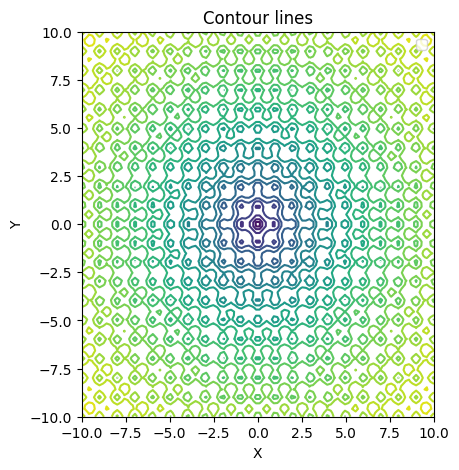

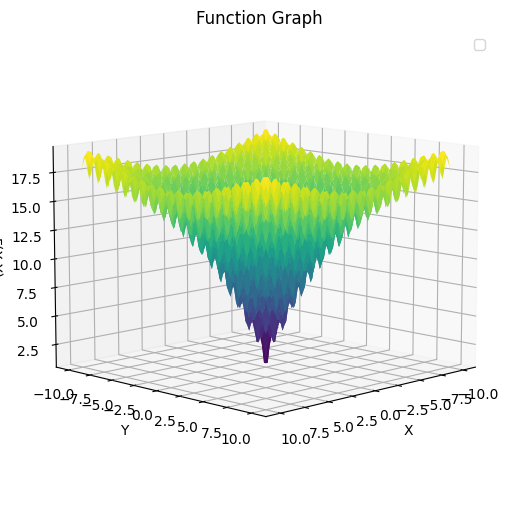

In [5]:
BenchmarkFunction(ackley_function, 2, 10).graph()

###Griewank Function

In [6]:
def griewank_function(X):
  sum1 = 0
  mult1 = 1

  for i in range(len(X)):
    sum1+=X[i]**2
    mult1*=np.cos(X[i]/((i+1)**0.5))

  return sum1/4000 - mult1 + 1

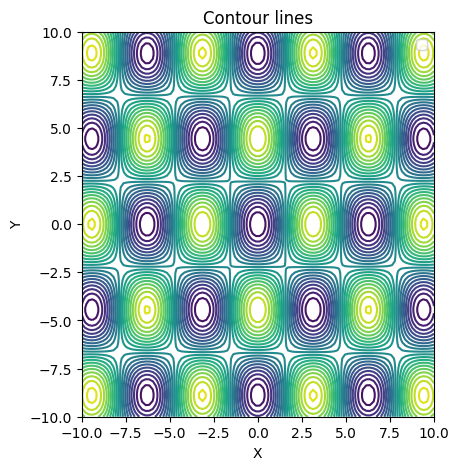

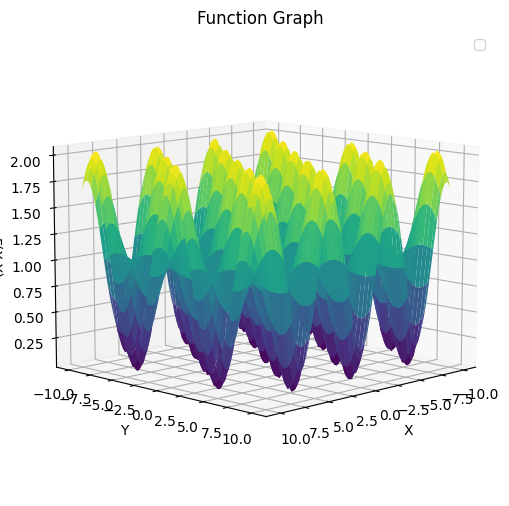

In [7]:
BenchmarkFunction(griewank_function, 2, 10).graph()

##Clonal Selection Algorithm

In [13]:
class CSA:
    def __init__(self, function: BenchmarkFunction) -> None:
        """
        Class constructor

        Parameters:
        function (BenchmarkFunction): Function to optimize.
        """
        #Select the function
        self.function = function
        pass

    def start(self, n_pop, n_select, n_clones, n_iter, mutation_rate=0.1):
        """
        Optimize the function using the Clonal Selection Algorithm.

        Parameters:
        n_pop (int): Population size.
        n_select (int): Number of selected solutions.
        n_clones (int): Number of clones per selected solution.
        n_iter (int): Number of iterations.
        mutation_rate (float): Mutation rate.
        """
        #Initialize
        self.population = np.random.uniform(-self.function.limits, self.function.limits, (n_pop, self.function.features))

        for i in range(n_iter):
            print(f'\n\n[Iteration {i}]')

            print(f'\nCurrent solutions Graph\n')
            self.function.graph(self.population)

            #Evaluation
            fitness = [self.function.evaluate(x) for x in self.population]
            #Selection
            selected_idx = np.argsort(fitness)[:n_select]

            #Clone
            clones = np.repeat(self.population[selected_idx], n_clones, axis=0)

            #Mutation
            for i in range(clones.shape[0]):
               clones[i] += np.random.uniform(np.min(self.population)*mutation_rate, np.max(self.population) * mutation_rate, clones[i].shape)

            #Repair
            clones = np.clip(clones, -self.function.limits, self.function.limits)

            print(f'\n-Clonal Selection Graph')
            self.function.graph_clones(self.population[selected_idx], clones)

            #Evaluation
            clones_fitness = [self.function.evaluate(x) for x in clones]


            #Replacement
            concat_fitness = np.concatenate((fitness, clones_fitness))
            concat_population = np.concatenate((self.population, clones))
            selected_idx = np.argsort(concat_fitness)[:n_pop]
            self.population = concat_population[selected_idx]

#Testing



[Iteration 0]

Current solutions Graph



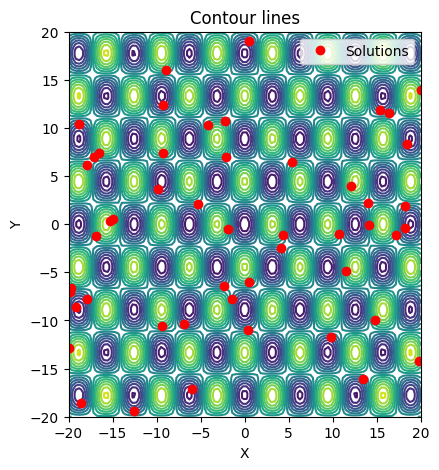

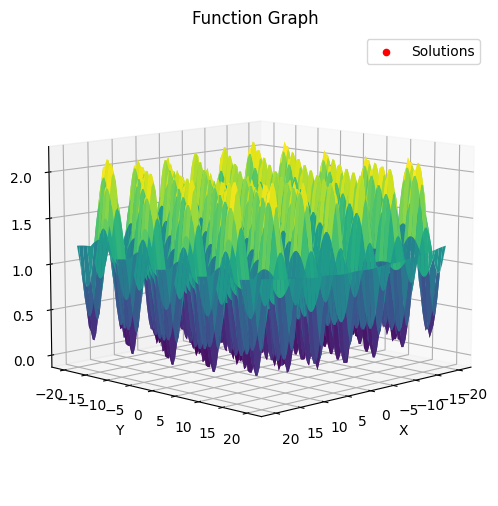


-Clonal Selection Graph


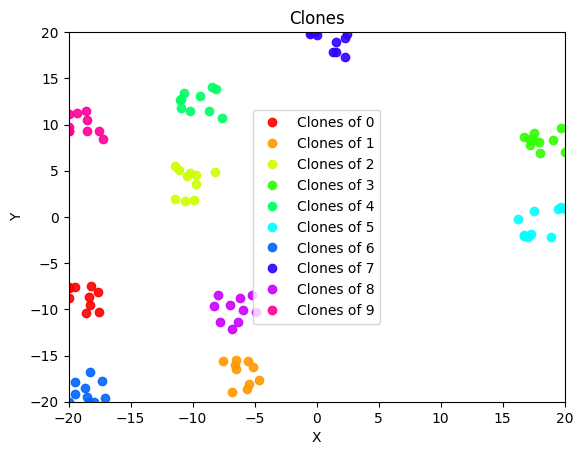



[Iteration 1]

Current solutions Graph



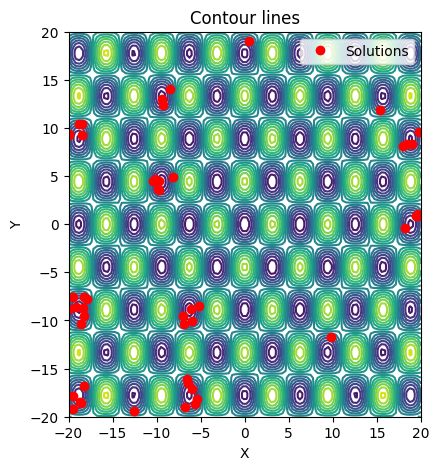

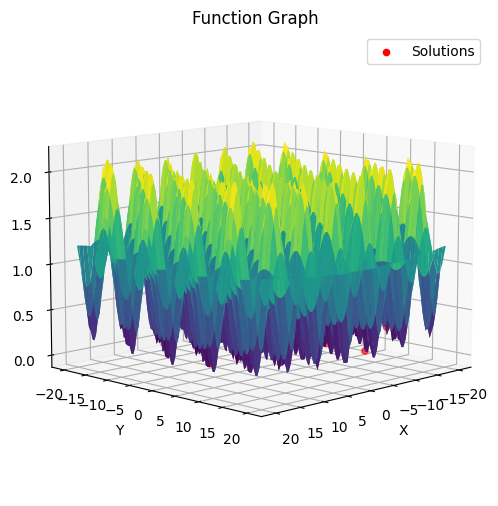


-Clonal Selection Graph


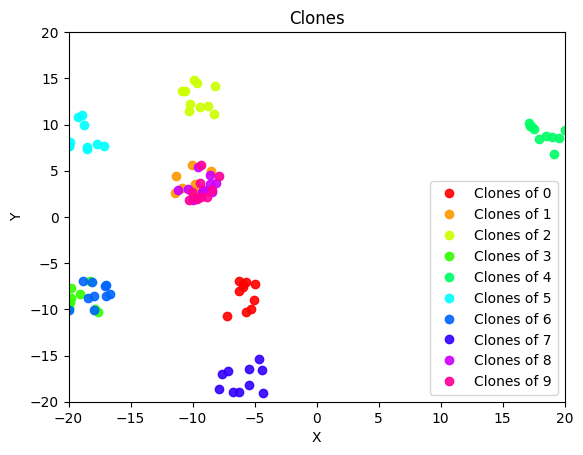



[Iteration 2]

Current solutions Graph



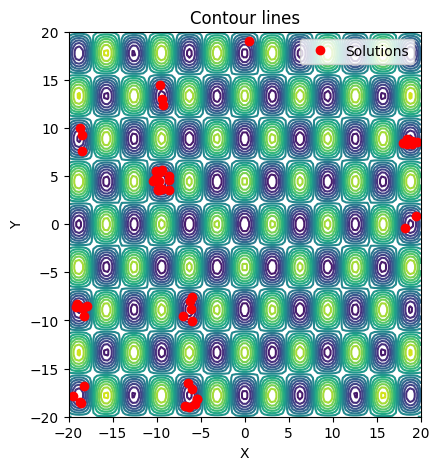

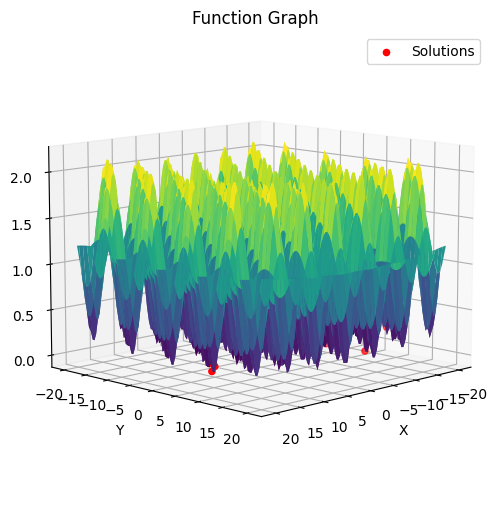


-Clonal Selection Graph


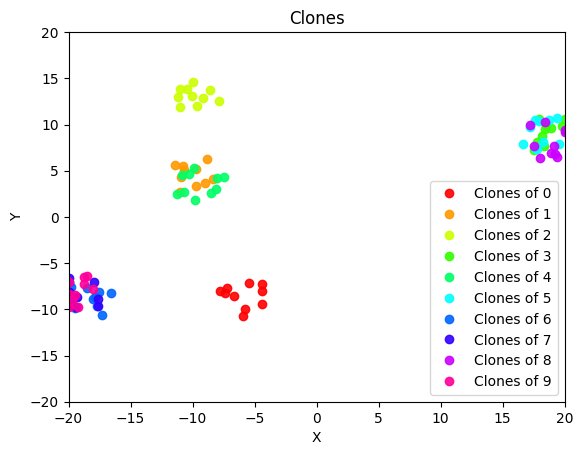



[Iteration 3]

Current solutions Graph



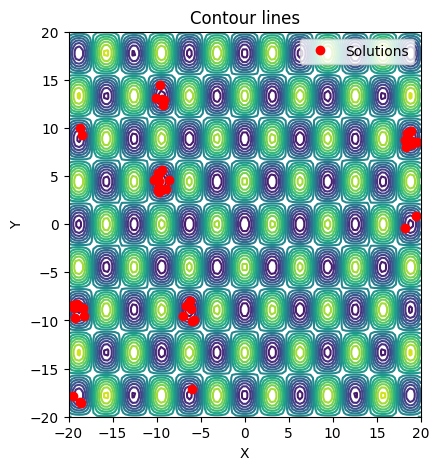

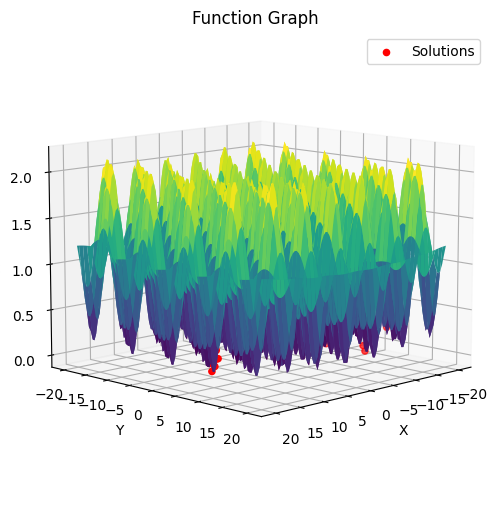


-Clonal Selection Graph


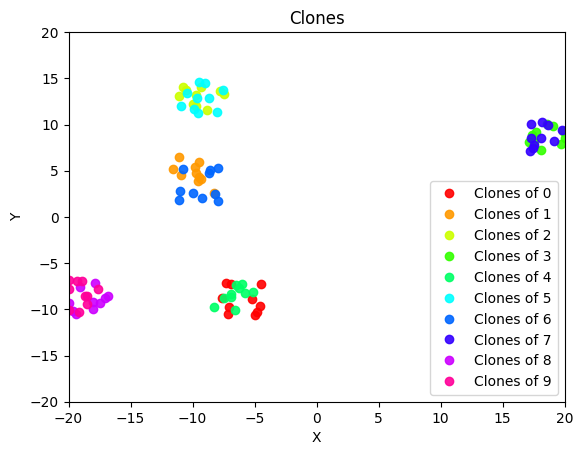



[Iteration 4]

Current solutions Graph



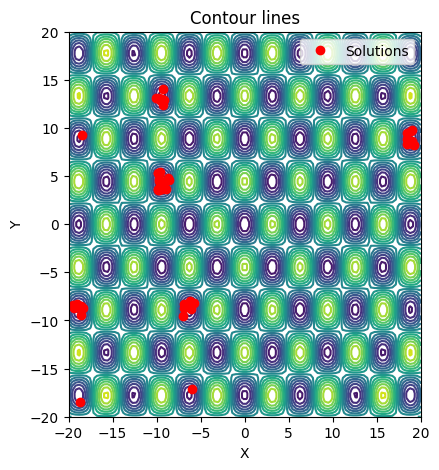

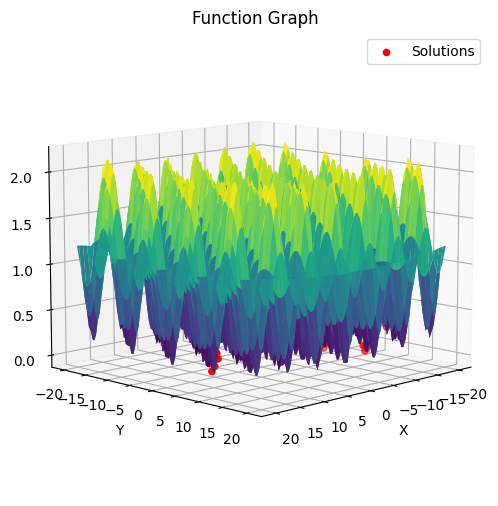


-Clonal Selection Graph


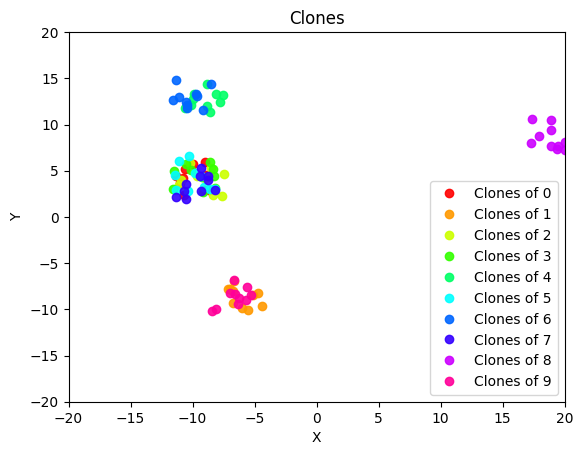



[Iteration 5]

Current solutions Graph



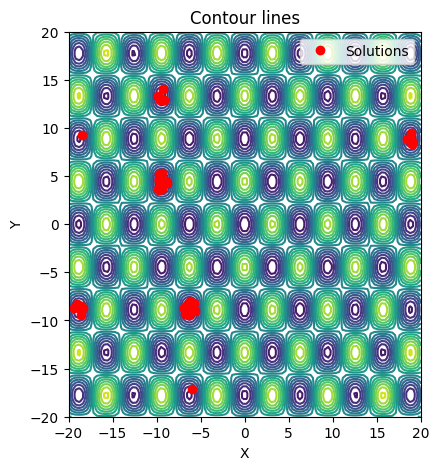

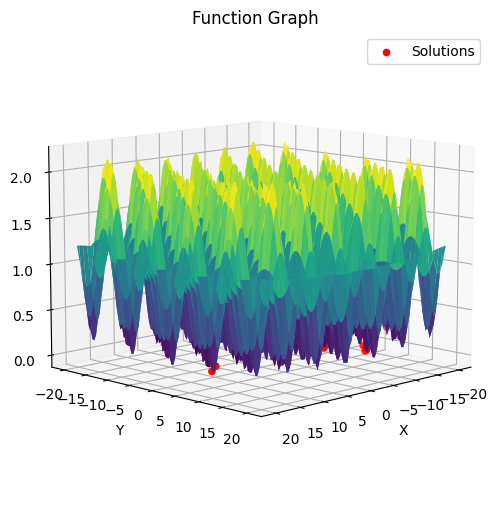


-Clonal Selection Graph


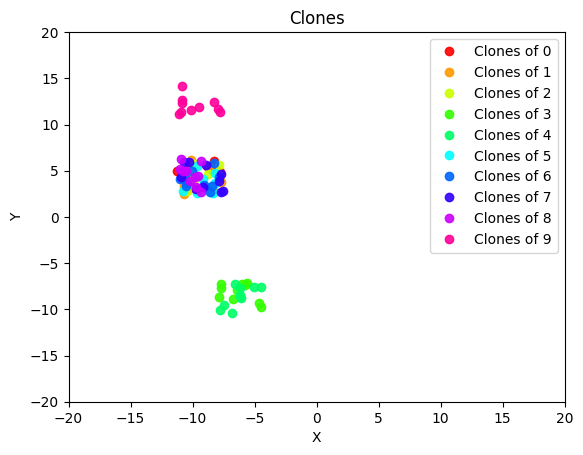



[Iteration 6]

Current solutions Graph



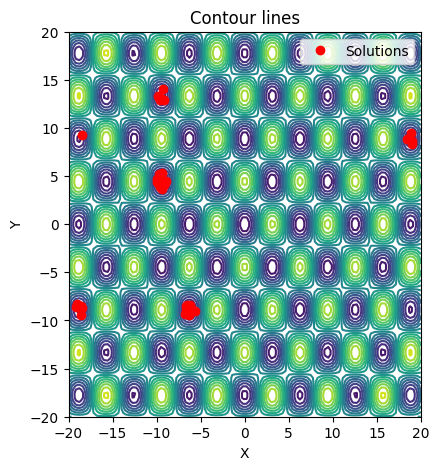

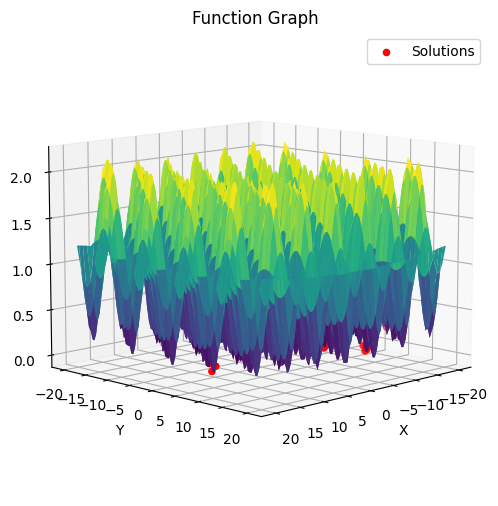


-Clonal Selection Graph


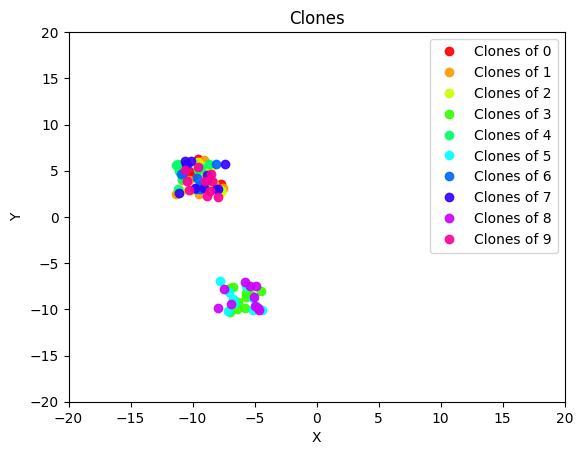



[Iteration 7]

Current solutions Graph



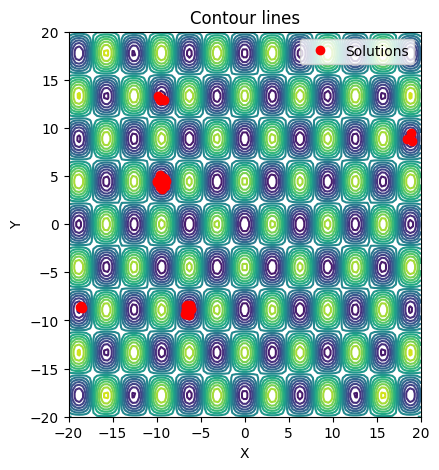

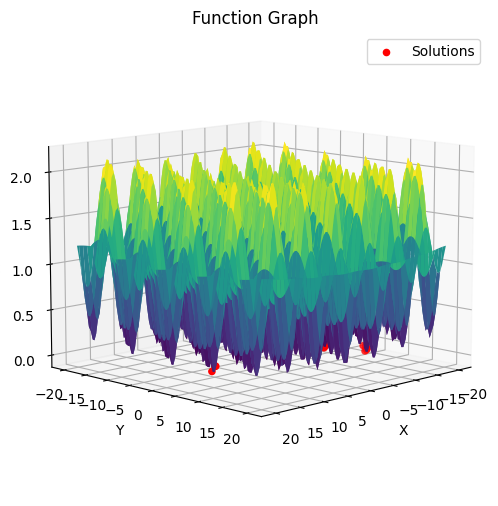


-Clonal Selection Graph


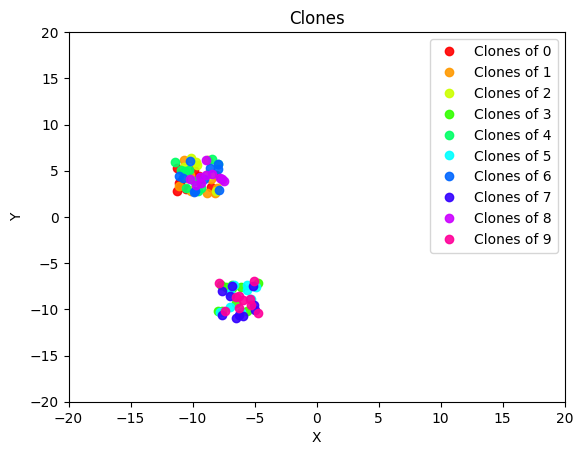



[Iteration 8]

Current solutions Graph



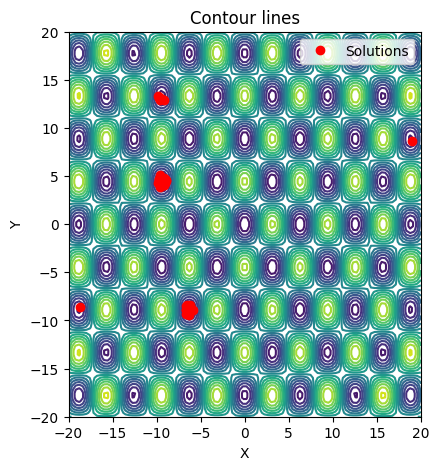

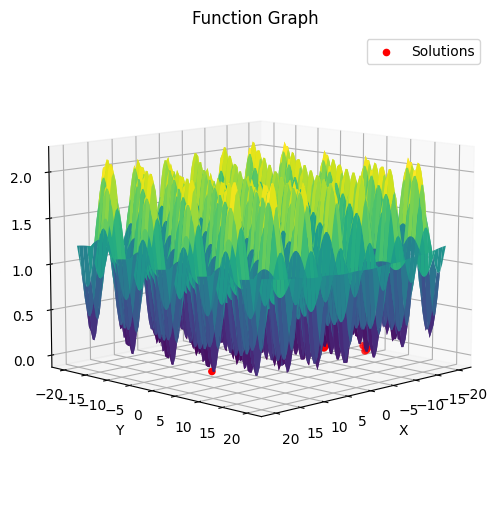


-Clonal Selection Graph


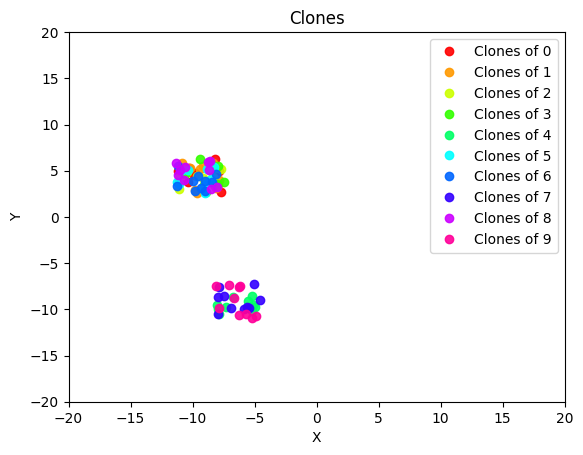



[Iteration 9]

Current solutions Graph



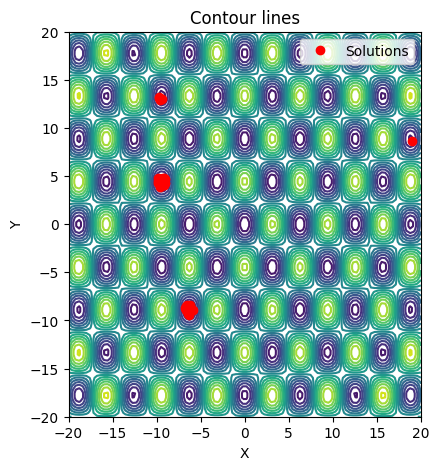

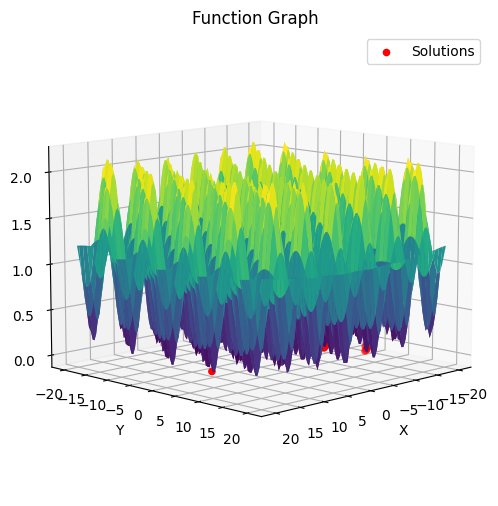


-Clonal Selection Graph


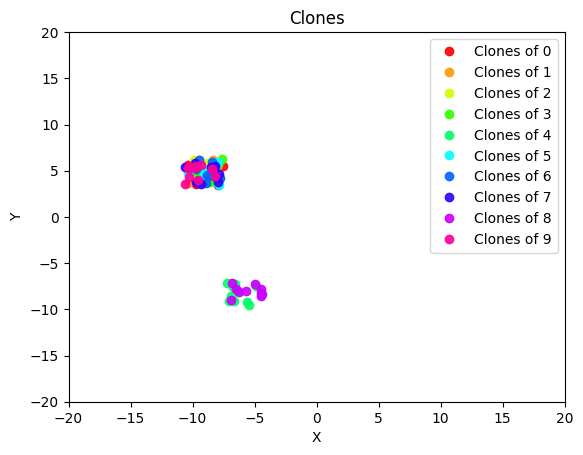

In [15]:
#@title Clonal Selection Testing

FUNCTION_NAME = 'griewank' #@param["ackley", "griewank"]
LIMITS = 20 # @param {type:"slider", min:0, max:100, step:1}
func = ackley_function if FUNCTION_NAME == 'ackley' else griewank_function

function = BenchmarkFunction(func, 2, LIMITS)

csa = CSA(function)
N_POP = 50 #@param {type:"slider", min:10, max:100, step:1}
N_SELECT = 10 #@param {type:"slider", min:10, max:100, step:1}
N_CLONES = 10 #@param {type:"slider", min:10, max:100, step:1}
N_ITER = 10 #@param {type:"slider", min:10, max:100, step:1}
MUTATION_RATE = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}

csa.start(N_POP, N_SELECT, N_CLONES, N_ITER, MUTATION_RATE)